In [9]:
import numpy as np
import h5py
import cv2
import os, sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # "0,1,2,3" # "0"
import matplotlib.pyplot as plt
from copy import deepcopy
from core.median_filter import apply_median_filter_gpu_simple
from core.CD_measure import *
from skimage.metrics import *
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

def return_img(img_dict): 
    img_info = {}
    for set_num in img_dict.keys():
        for f_num in img_dict[set_num].keys():
            for idx,img in enumerate(img_dict[set_num][f_num]):
                img_info = {'set_num' : set_num, 'f_num' : f_num, 'idx' : idx}
                yield img_info, img

def return_img_fnum(img_dict,specific_f_num_list): 
    img_info = {}
    for set_num in img_dict.keys():
        for f_num in img_dict[set_num].keys():
            if f_num not in specific_f_num_list:
                continue
            for idx,img in enumerate(img_dict[set_num][f_num]):
                img_info = {'set_num' : set_num, 'f_num' : f_num, 'idx' : idx}
                yield img_info, img

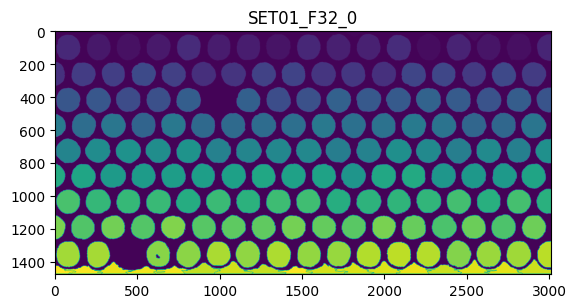

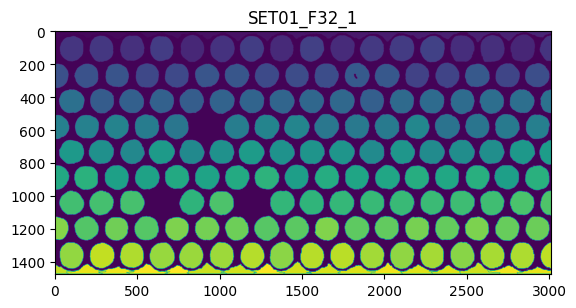

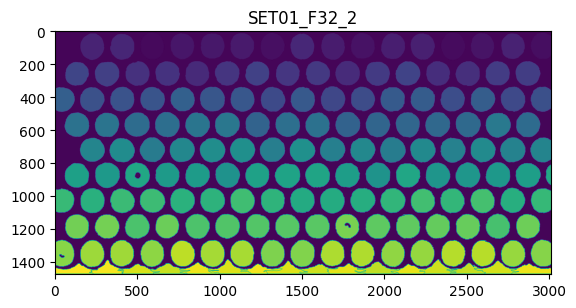

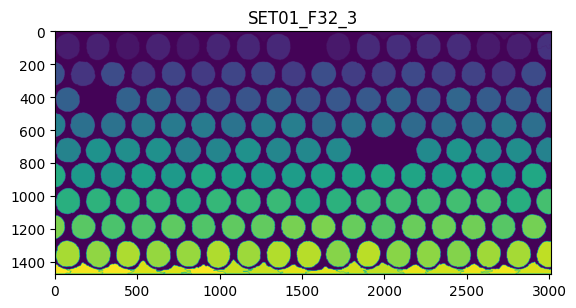

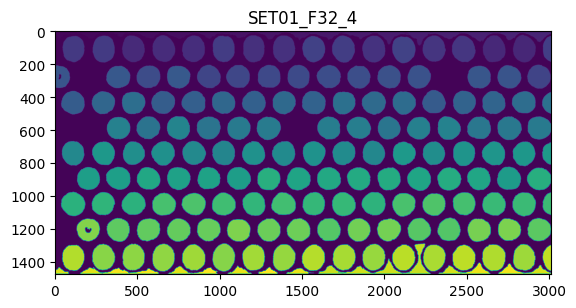

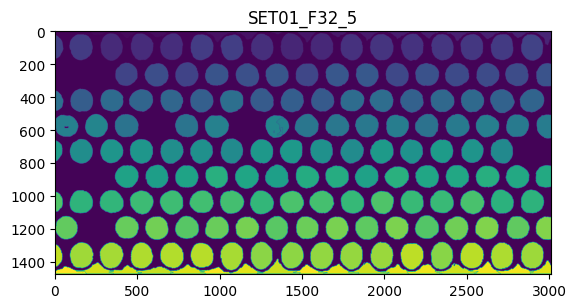

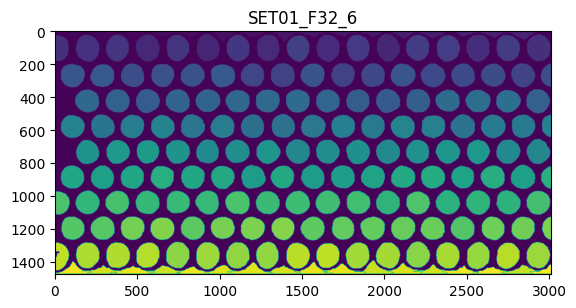

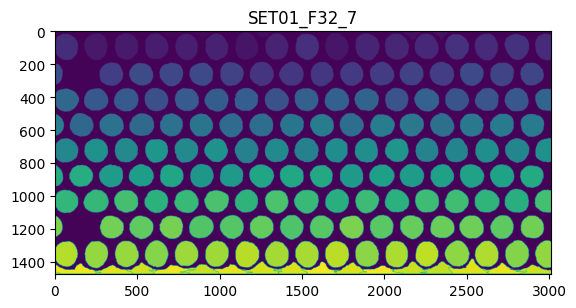

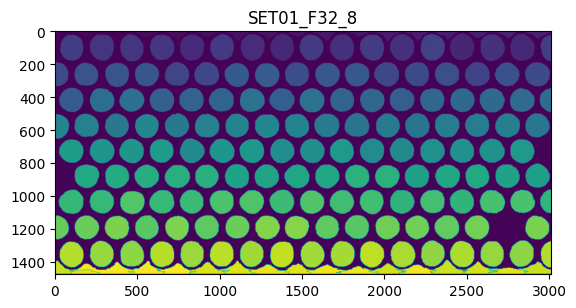

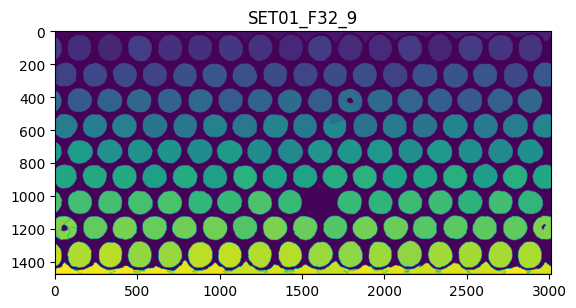

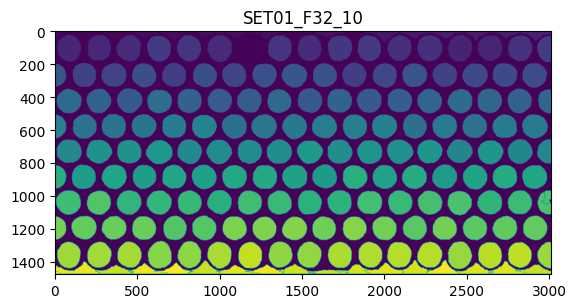

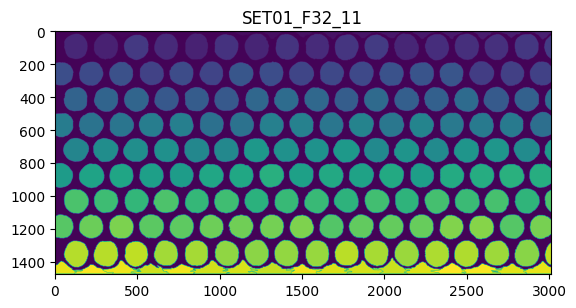

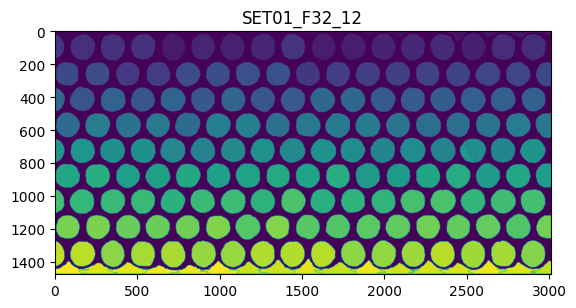

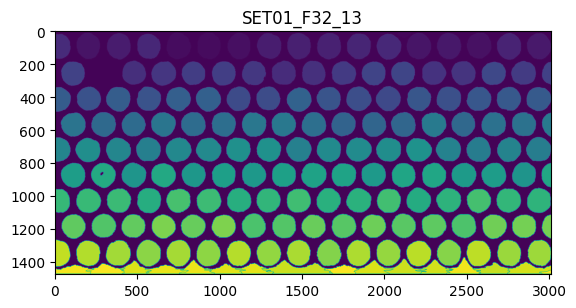

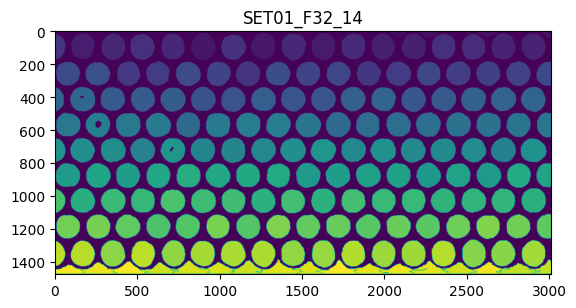

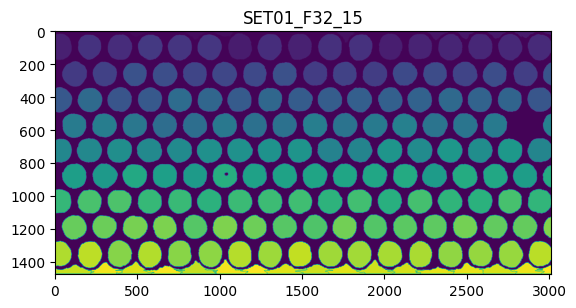

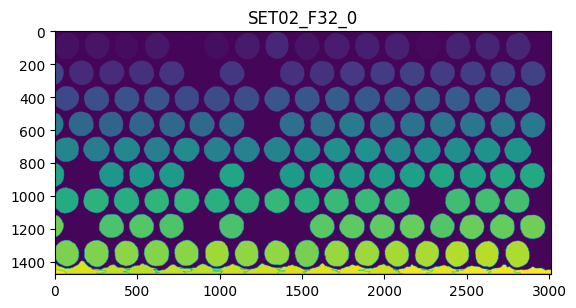

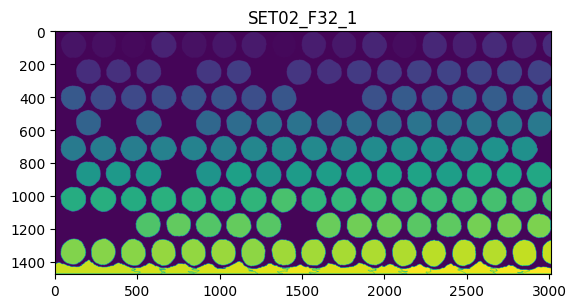

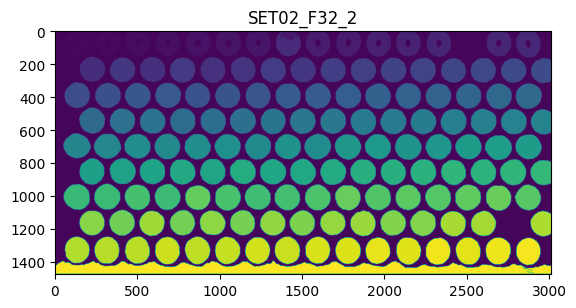

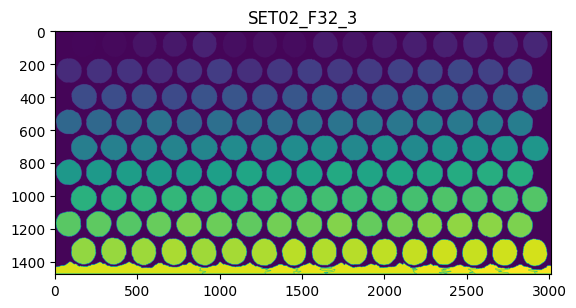

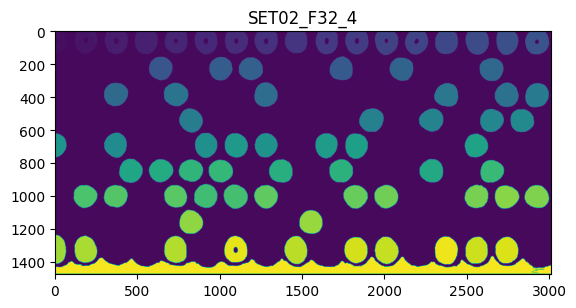

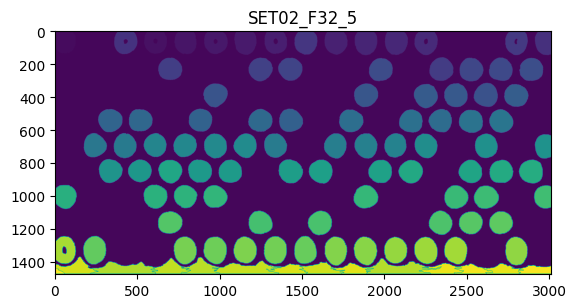

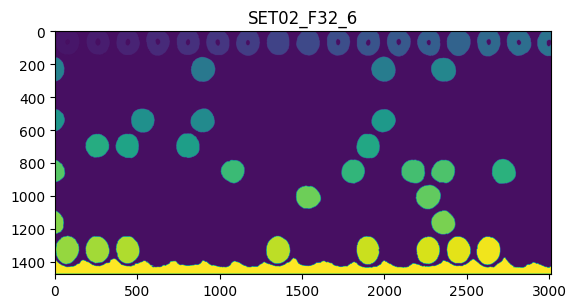

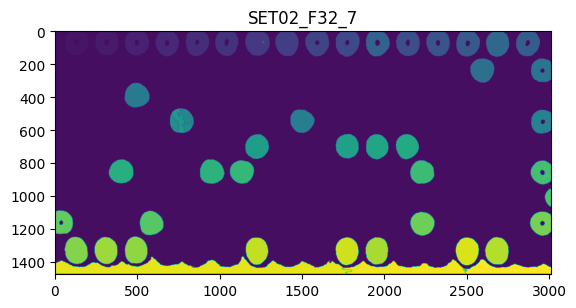

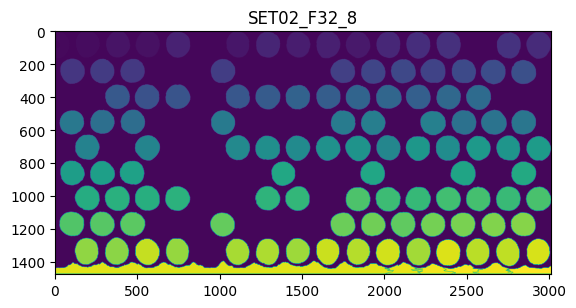

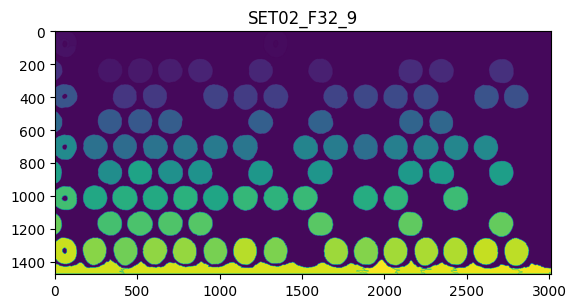

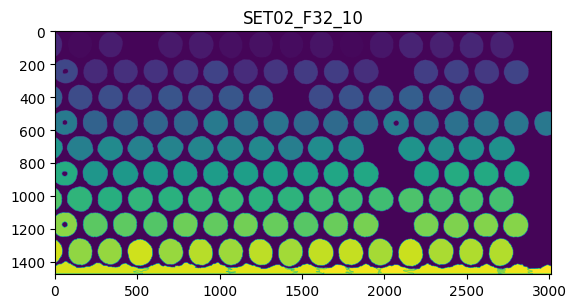

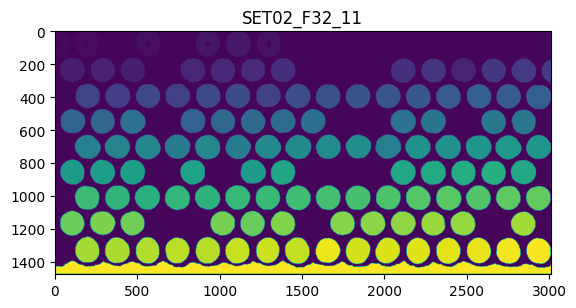

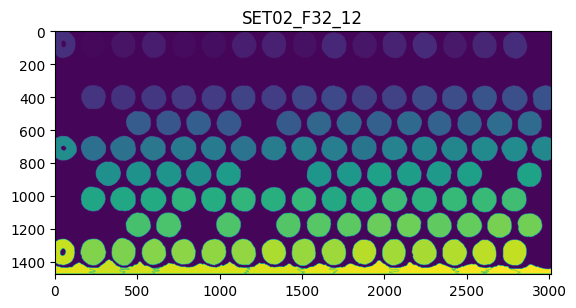

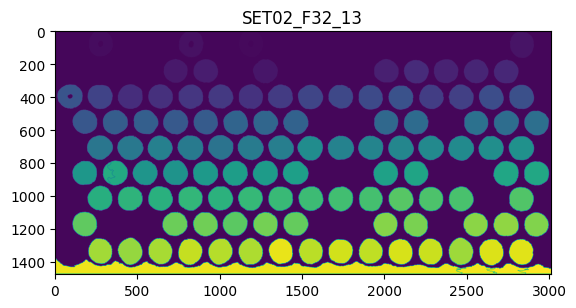

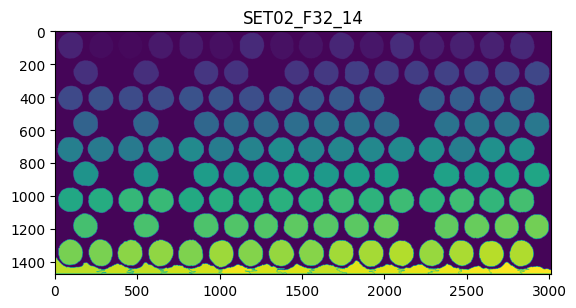

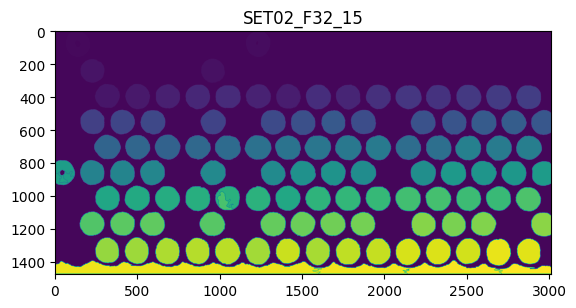

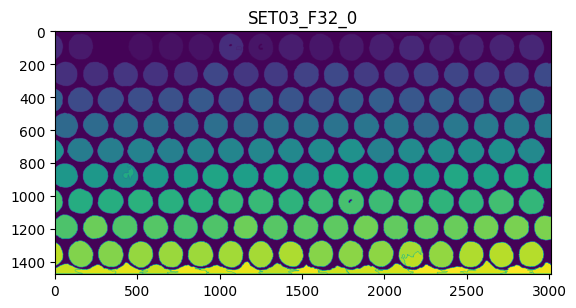

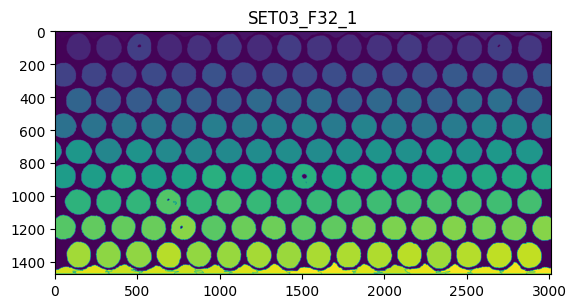

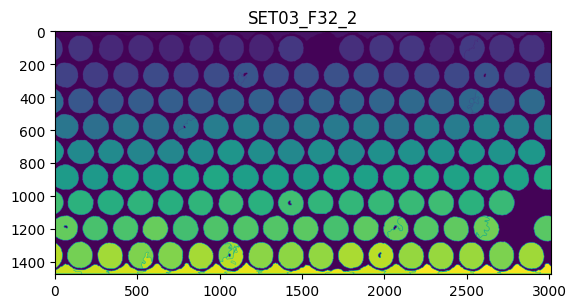

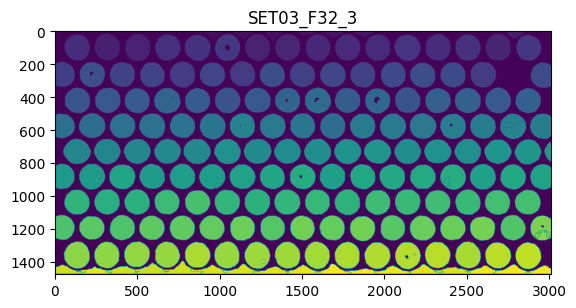

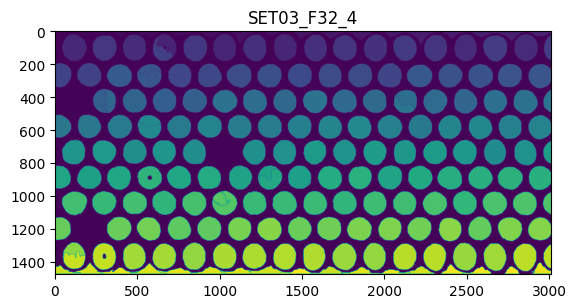

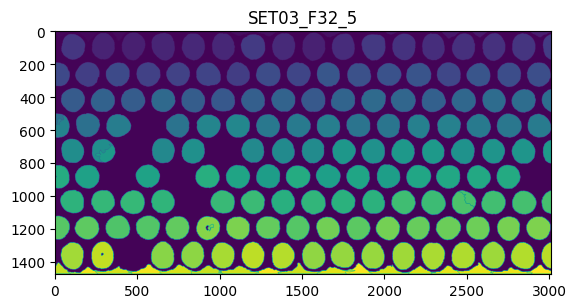

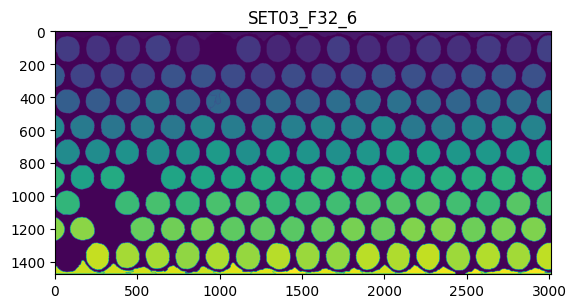

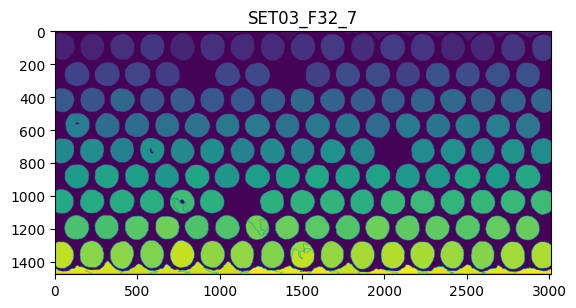

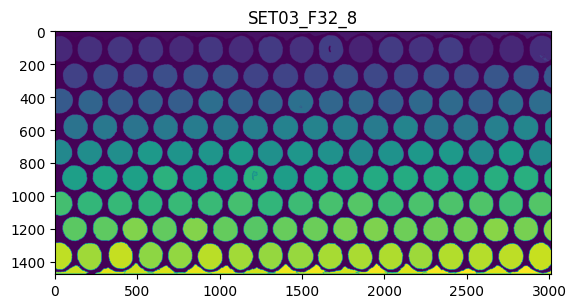

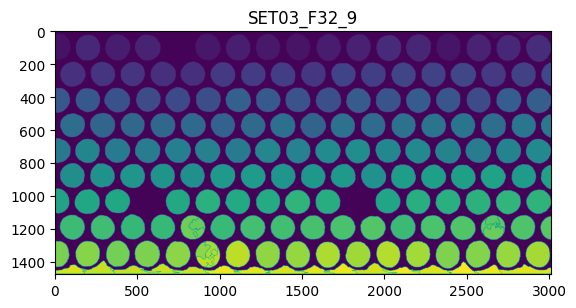

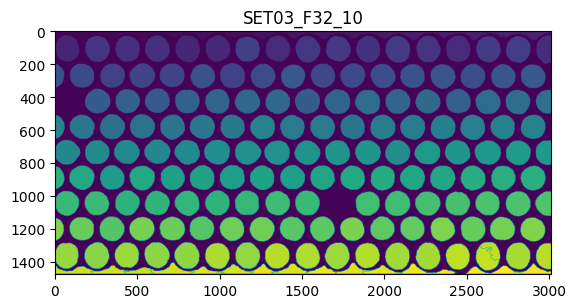

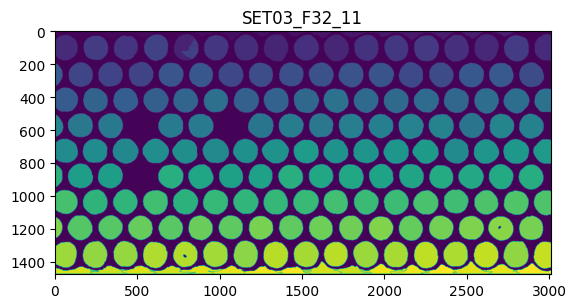

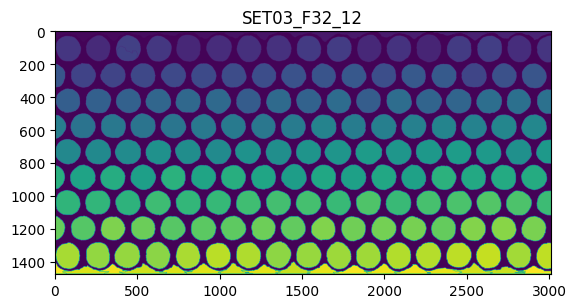

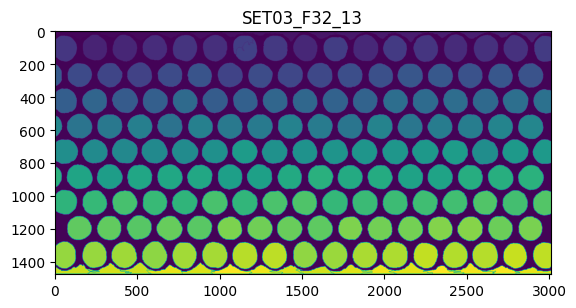

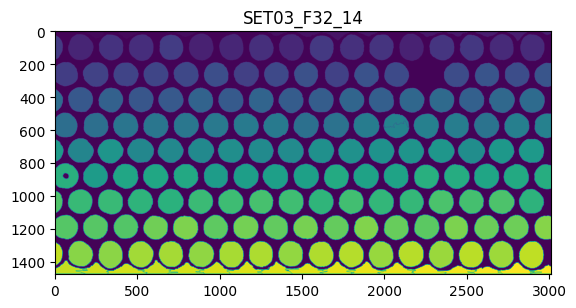

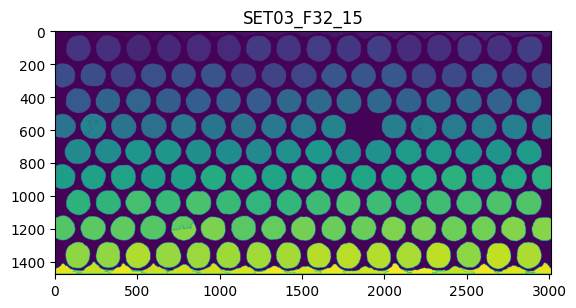

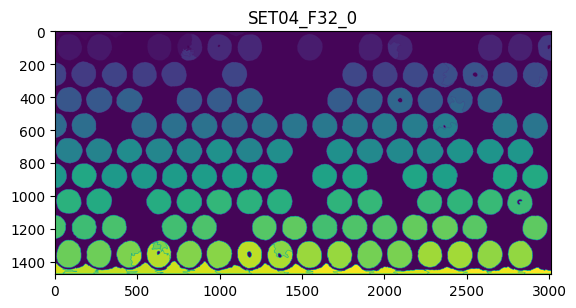

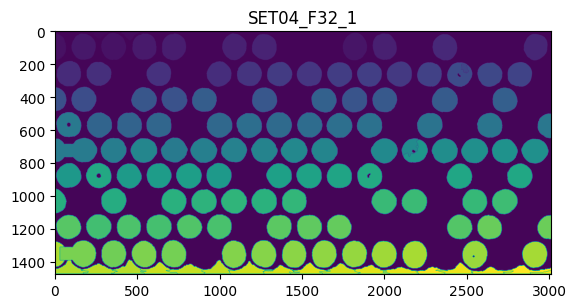

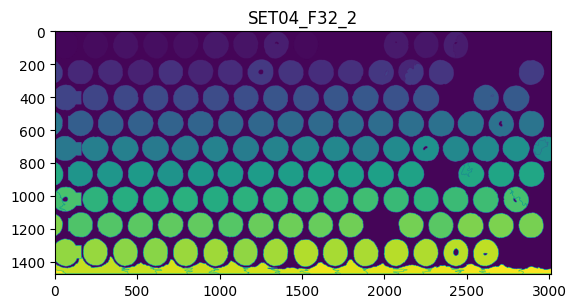

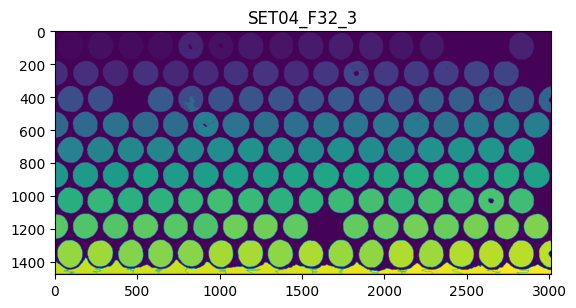

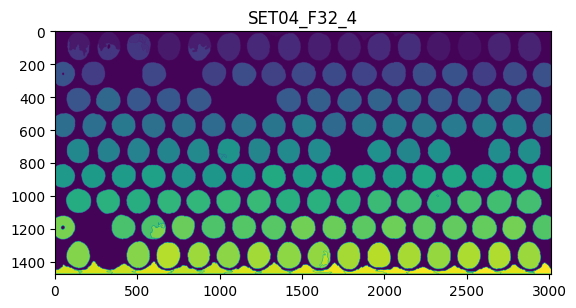

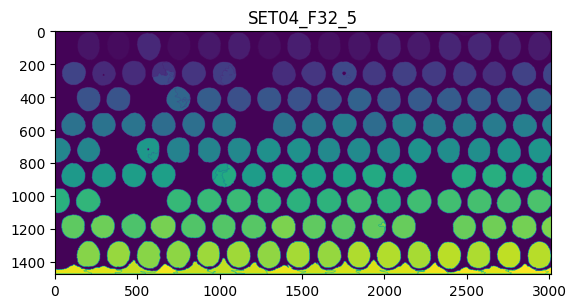

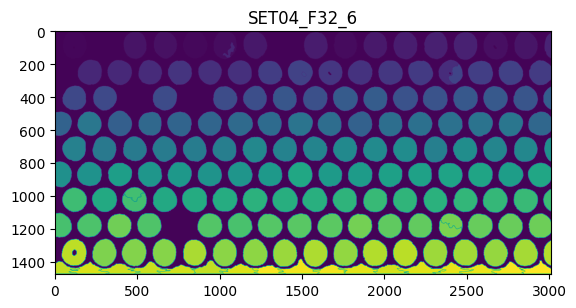

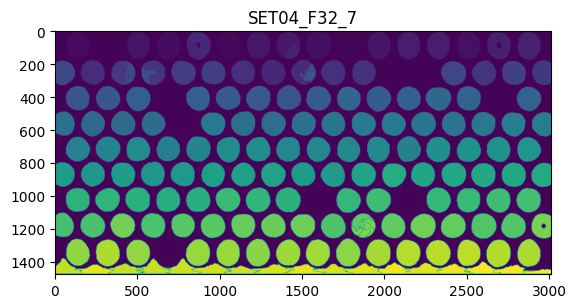

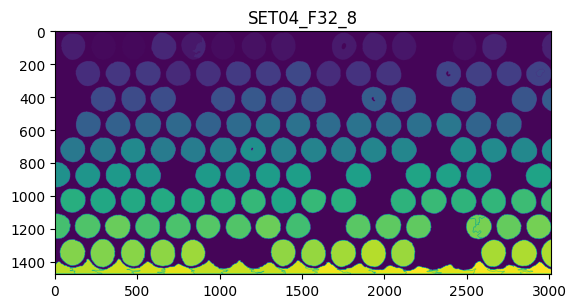

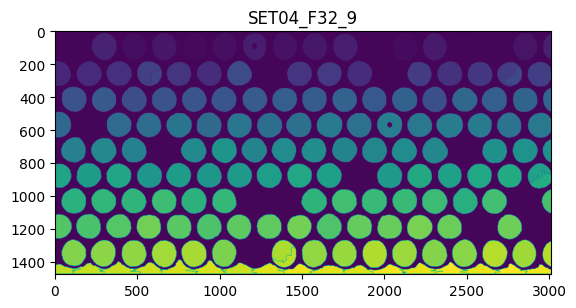

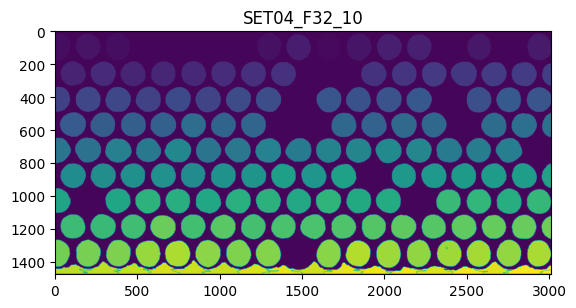

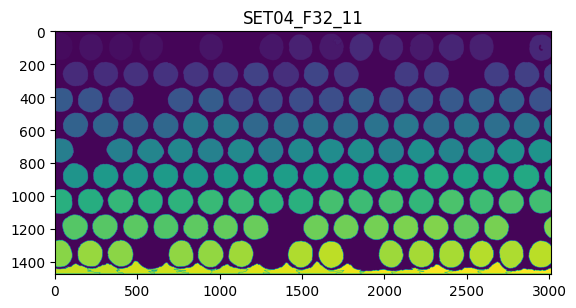

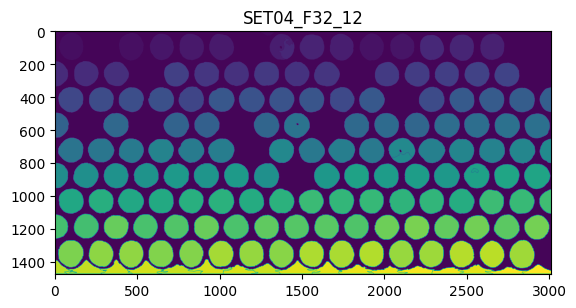

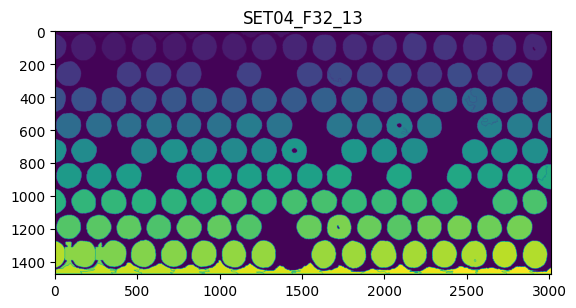

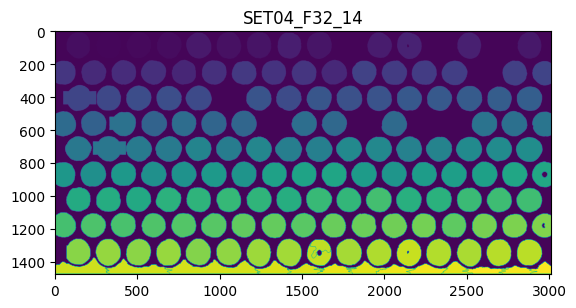

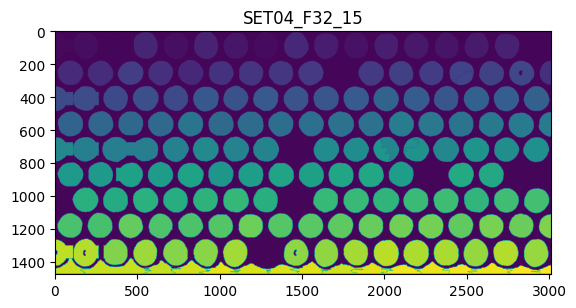

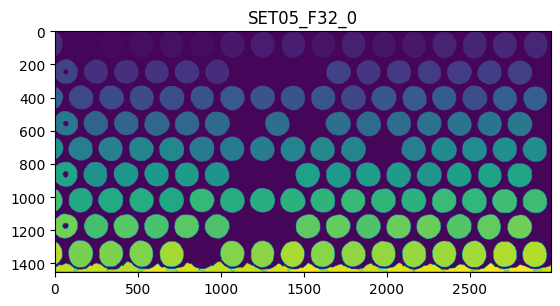

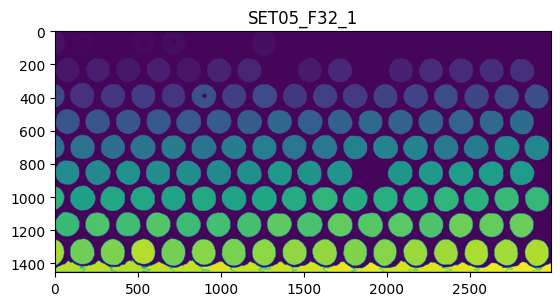

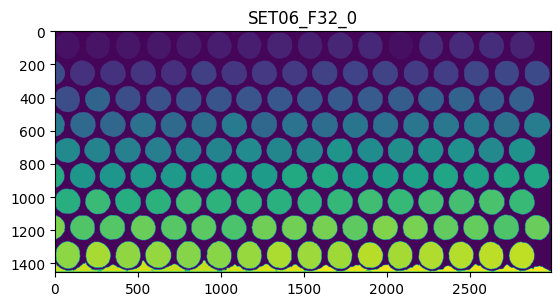

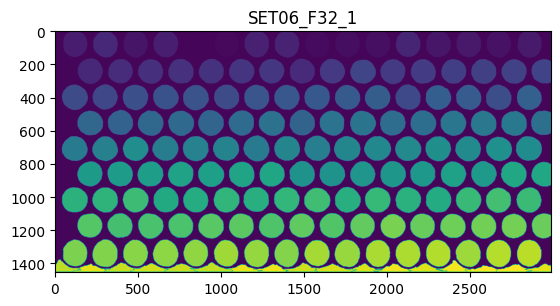

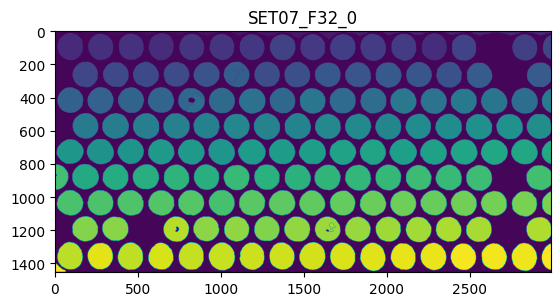

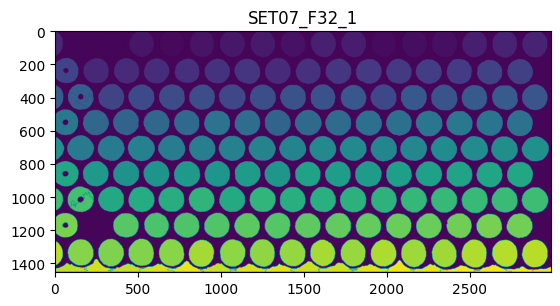

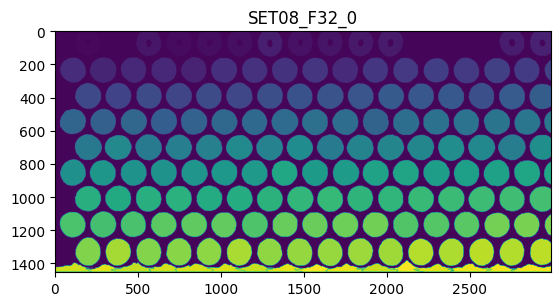

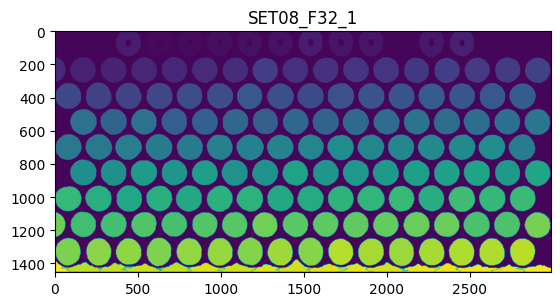

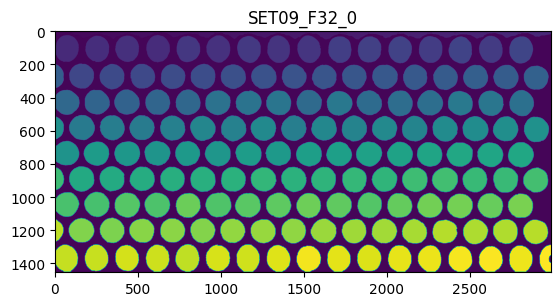

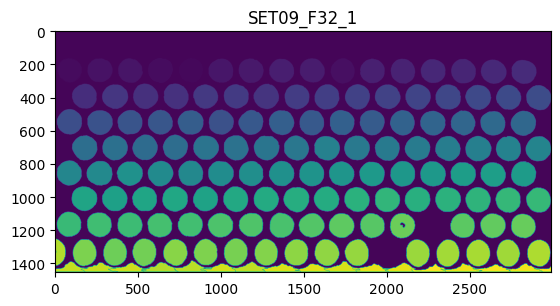

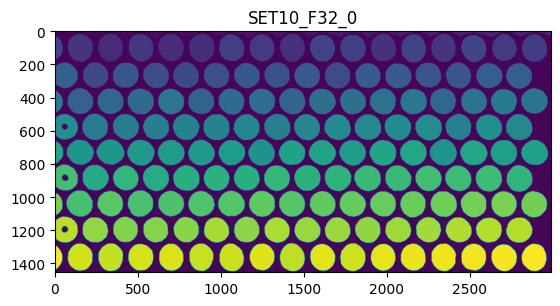

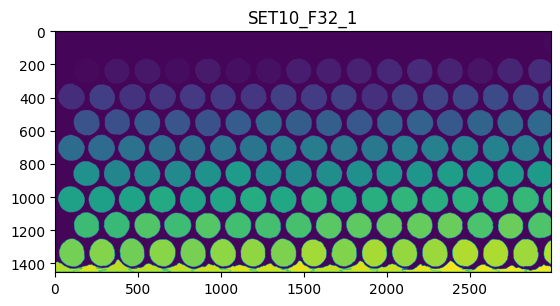

In [4]:
from celluloid import Camera # getting the camera
from IPython.display import HTML
import matplotlib.pyplot as plt
target = 'median_filter'
segmentation_npy = f'./intermediate_result/segmentation_img_{target}.npy'

segmentation_images = np.load(segmentation_npy,allow_pickle=True).item()
# gen = return_img(denoised_images)

gen = return_img_fnum(segmentation_images,['F32'])

for img_info, img in gen:
    title= "_".join(map(str,img_info.values()))
    plt.title(title)
    plt.imshow(img)
    plt.pause(0.01)


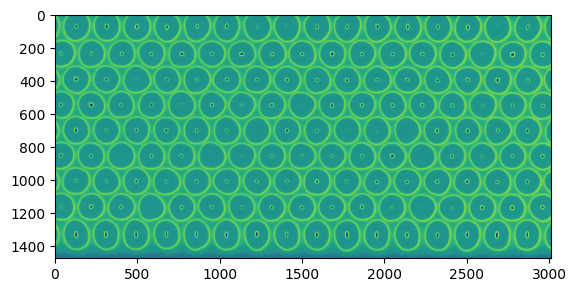

In [19]:
target = 'F16_v2'
denoised_npy = f'./intermediate_result/denoised_img_{target}_img_dict.npy'

denoised_images = np.load(denoised_npy,allow_pickle=True).item()
plt.imshow(denoised_images['SET02']['F32'][7][0])

In [22]:

set_num, f_num, idx = 'SET02', 'F32', 7 #img_info.values()
set_num, f_num, idx

('SET02', 'F32', 7)

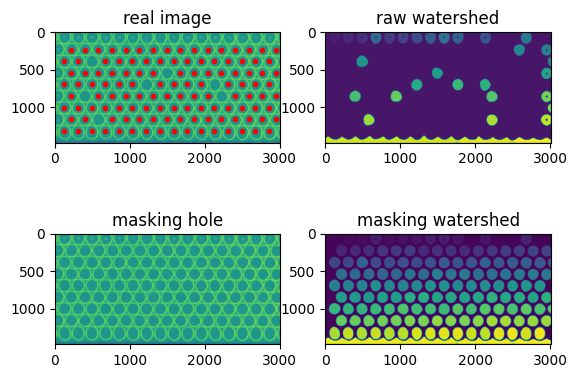

In [26]:
denoised_img_uint8 = (denoised_images['SET02']['F32'][7][0] * 255).astype('uint8')
new_segmentation = segmentation_with_masking(denoised_img_uint8,img_info=None, print_plt=True)

KeyError: 'method'